<center><font size="5"><b>ĐỒ ÁN CUỐI KỲ: MÔ HÌNH KHÍ HẬU</b></font></center>

| MSSV     | Họ và tên         |
|----------|-------------------|
| 19120539 | Vương Thế Khang   |
| 19120555 | Lê Kiệt           |
| 19120571 | Nguyễn Minh Lương |

## THƯ VIỆN

In [1]:
import types
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
temp_df = pd.read_csv('graph.csv', skiprows = 1, index_col = 0)
temp_df = temp_df + 14.15
temp_df

,No_Smoothing,Lowess(5)
Year,,
1880,13.98,14.06
1881,14.07,14.02
1882,14.04,13.98
1883,13.97,13.95
1884,13.86,13.91
...,...,...
2017,15.07,15.06
2018,14.99,15.07
2019,15.12,15.07


In [3]:
forcings_df = pd.read_csv('forcings.csv', index_col = 0)
forcings_df = forcings_df - 273.5
forcings_df

,All forcings,Human,Natural,Anthropogenic tropospheric aerosol,Greenhouse gases,Land use,Orbital changes,Ozone,Solar,Volcanic
Year,,,,,,,,,,
1850,13.967659,13.928996,13.946649,13.925891,13.917000,13.950350,13.942937,13.950645,13.950350,13.946649
1851,14.017853,13.933725,13.960201,13.946402,13.899260,13.894453,13.950825,13.907646,13.934744,13.958259
1852,14.017558,13.973824,14.030642,13.998657,13.915606,13.982750,13.953118,13.947467,13.966309,14.060542
1853,13.978262,13.954695,14.019732,13.917325,13.933217,14.009894,13.968205,13.975366,13.955296,14.034299
1854,13.977572,13.917804,14.007810,13.924542,13.920589,13.945774,13.986590,13.954192,13.936233,14.052440
...,...,...,...,...,...,...,...,...,...,...
2001,14.820929,14.684239,14.026614,13.468754,15.052342,13.823666,13.889576,14.018246,13.972521,13.999175
2002,14.835254,14.718673,14.045374,13.522696,15.094759,13.861851,13.899834,14.045542,13.977142,14.004434
2003,14.848285,14.759768,14.034229,13.533548,15.095026,13.845990,13.960698,14.003628,13.979919,14.015221


## TỔNG QUAN CÁC HIỆN TƯỢNG VẬT LÝ KHÍ HẬU

### 1. Bức xạ mặt trời hấp thụ

In [4]:
S = 1368 # solar insolation (W/m^2)

In [5]:
alpha = 0.3 # albedo or plentary reflectivity

$$ \text{absorbed solar insolation} = \frac{S(1 - \alpha)}{4} $$

In [6]:
def absorbed_solar_insolation(alpha = alpha, S = S):
    return S * (1 - alpha) / 4

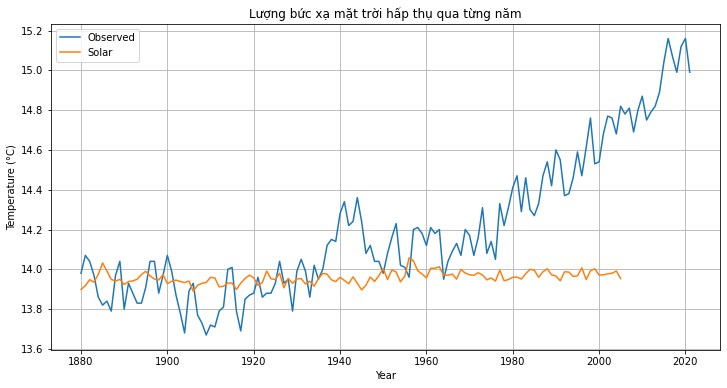

In [7]:
fig, ax = plt.subplots(figsize = (12, 6))
ax.plot(temp_df['No_Smoothing'])
ax.plot(forcings_df['Solar'].loc[1880:])
ax.legend(['Observed', 'Solar'])
ax.grid()
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('Lượng bức xạ mặt trời hấp thụ qua từng năm')
plt.show()

### 2. Bức xạ nhiệt đi ra ngoài

In [8]:
T0 = 14 # preindustrial temperature before 1850 (°C)

In [9]:
B = -1.3 # climate feedback parameter (W/m^2/°C)

$$ \text{outgoing thermal radiation} = A - BT $$

mà

$$ \text{absorbed solar insolation} = \text{outgoing thermal radiation} $$

$$ \frac{S(1 - \alpha)}{4} = A - BT_0 $$

In [10]:
A = S * (1 - alpha) / 4 + B * T0

In [11]:
def outgoing_thermal_radiation(T, A = A, B = B):
    return A - B * T

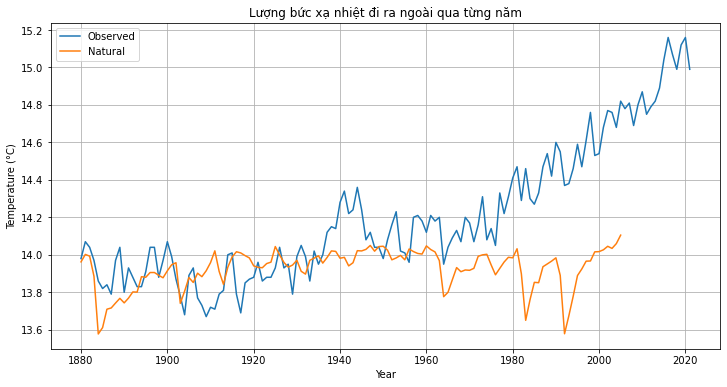

In [12]:
fig, ax = plt.subplots(figsize = (12, 6))
ax.plot(temp_df['No_Smoothing'])
ax.plot(forcings_df['Natural'].loc[1880:])
ax.legend(['Observed', 'Natural'])
ax.grid()
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('Lượng bức xạ nhiệt đi ra ngoài qua từng năm')
plt.show()

### 3. Hiệu ứng nhà kính do con người gây ra

In [13]:
a = 5 # co2 forcing coefficient (W/m^2)

In [14]:
co2_pi = 280 # preindustrial co2 concentration (ppm)

$$ \text{human-caused greenhouse effect} = a * ln \frac{CO_2}{CO_{2, PI}} $$

In [15]:
def human_caused_greenhouse_effect(co2, a = a, co2_pi = co2_pi):
    return a * np.log(co2 / co2_pi)

In [16]:
def co2(t):
    return co2_pi * (1 + ((t - t0) / 220)**3)

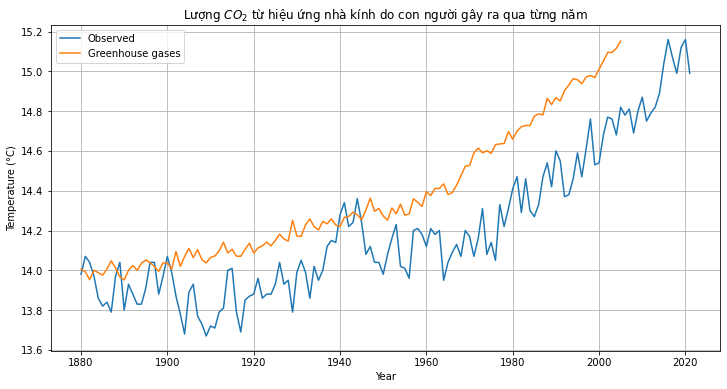

In [17]:
fig, ax = plt.subplots(figsize = (12, 6))
ax.plot(temp_df['No_Smoothing'])
ax.plot(forcings_df['Greenhouse gases'].loc[1880:])
ax.legend(['Observed', 'Greenhouse gases'])
ax.grid()
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('Lượng $CO_2$ từ hiệu ứng nhà kính do con người gây ra qua từng năm')
plt.show()

### 4. Thay đổi hàm nhiệt lượng

In [18]:
C = 51 # atmosphere and upper-ocean heat capacity (J/m^2/°C)

$$ \text{change in heat content} = C \frac{dT}{dt} $$

## PHƯƠNG TRÌNH VI PHÂN CỦA MÔ HÌNH KHÍ HẬU

$$ \text{change in heat content} = \text{absorbed solar insolation} - \text{outgoing thermal radiation} + \text{human-caused greenhouse effect} $$

$$ C \frac{dT}{dt} = \frac{S(1 - \alpha)}{4} - (A - BT_0) + a * ln \frac{CO_2}{CO_{2, PI}} $$

$$ C \frac{T(t + \Delta t) - T(t)}{\Delta t} = \frac{S(1 - \alpha)}{4} - (A - BT_0) + a * ln \frac{CO_2}{CO_{2, PI}} $$

$$ T(t + \Delta t) = T(t) + \frac{\Delta t}{C} \bigg[\frac{S(1 - \alpha)}{4} - (A - BT_0) + a * ln \frac{CO_2}{CO_{2, PI}} \bigg] $$

In [19]:
t0 = 1850 # industrial revolution start

In [20]:
class EBM():
    def __init__(self, t0 = None, delta_t = None, co2 = None, S = 1368, alpha = 0.3, T0 = 14, B = -1.3, a = 5, co2_pi = 280, C = 51):
        self.S = S
        self.alpha = alpha
        self.T0 = T0
        self.B = B
        self.A = self.S * (1 - self.alpha) / 4 + self.B * self.T0
        self.a = a
        self.co2_pi = co2_pi
        self.C = C

        self.T = np.empty([0])
        self.t = np.empty([0])
        
        if t0 == None:
            raise Exception("A parameter t0 cannot be empty")
        self.t0 = t0
        
        if delta_t == None:
            raise Exception("A parameter delta_t cannot be empty")
        self.delta_t = delta_t
        
        if co2 == None:
            raise Exception("A parameter co2 cannot be empty")
        if isinstance(co2, types.FunctionType) == False:
            raise Exception("A parameter co2 should be a function")
        self.co2 = co2
        
    def predict(self, predicted_year = None):
        if predicted_year == None:
            raise Exception("A variable predicted_year cannot be empty")
        if predicted_year < t0:
            raise Exception("Predited year should be bigger than original year")
            
        self.T = np.array([self.T0])
        self.t = np.array([self.t0])
        
        for i in range(predicted_year - t0):
            change_in_heat_content = absorbed_solar_insolation(alpha = self.alpha, S = self.S) \
                                    - outgoing_thermal_radiation(self.T[i], A = self.A, B = self.B) \
                                    + human_caused_greenhouse_effect(self.co2(self.t[i]), a = self.a, co2_pi = self.co2_pi)
            self.T = np.append(self.T, self.T[i] + self.delta_t * change_in_heat_content / self.C)
            self.t = np.append(self.t, self.t[i] + self.delta_t)

## ÁP DỤNG VÀO DỮ LIỆU THỰC TẾ

In [21]:
ebm = EBM(t0, 1, co2)
ebm.predict(2050)
predict_df = pd.DataFrame({'Year': ebm.t, 'Predict': ebm.T}).set_index('Year')
predict_df

,Predict
Year,
1850,14.000000
1851,14.000000
1852,14.000000
1853,14.000000
1854,14.000000
...,...
2046,15.301379
2047,15.320640
2048,15.340032


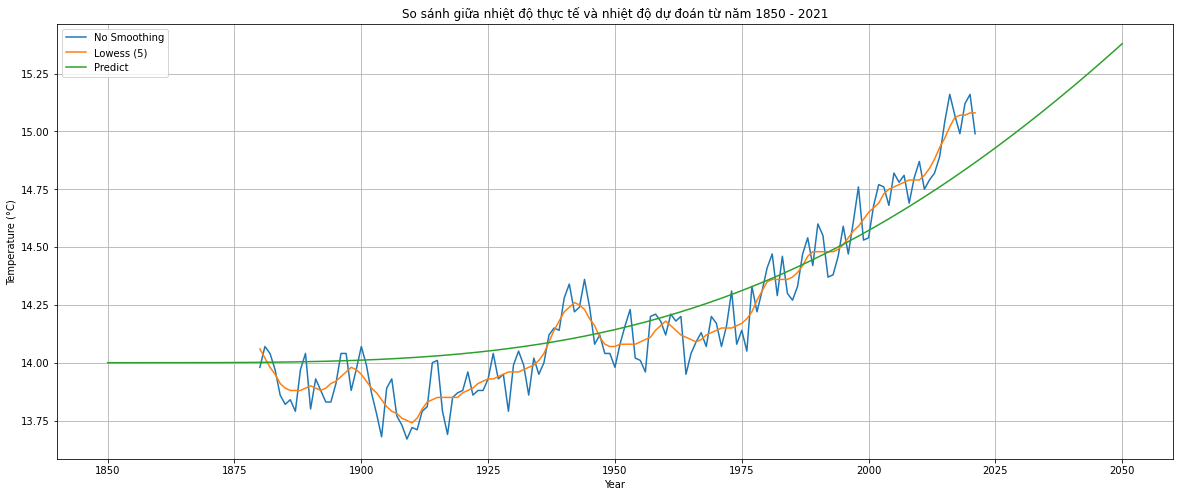

In [22]:
fig, ax = plt.subplots(figsize = (20, 8))
ax.plot(temp_df)
ax.plot(predict_df)
ax.legend(['No Smoothing', 'Lowess (5)', 'Predict'])
ax.grid()
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('So sánh giữa nhiệt độ thực tế và nhiệt độ dự đoán từ năm 1850 - 2021')
plt.show()

In [23]:
print('Dự đoán nhiệt độ vào năm 2050 là: {}°C'.format(predict_df['Predict'][2050]))

Dự đoán nhiệt độ vào năm 2050 là: 15.379207824814596°C
